## Import necessary packages 

Use a Python package to grab USGS data. Need to install the package beforehand. See details her: https://github.com/USGS-python/dataretrieval

In [174]:
import dataretrieval.nwis as nwis
import pandas as pd
from datetime import datetime
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('science')
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 22}

matplotlib.rc('font', **font)

## Define a funcation for each data download

First, let's define a function to retrieve data so that we don't need to write the same scripts for different sites. 

In [200]:
def read_site(sitename, start_date, drain_area):   
    df = nwis.get_record(sites=site, service='site')

    df1 = nwis.get_record(sites=sitename, service='dv', start=start_date, parameterCd = '63680')
    df2 = nwis.get_record(sites=sitename, service='dv', start=start_date, parameterCd = '00060')
    df3 = nwis.get_record(sites=sitename, service='dv', start=start_date, parameterCd = '00065')
    df4 = nwis.get_record(sites=sitename, service='dv', start=start_date, parameterCd = '00300')

    df1 = df1.drop(['site_no','63680_Maximum','63680_Minimum','63680_Mean_cd','63680_Minimum_cd','63680_Maximum_cd'],axis=1)
    df1 = df1.rename(columns={"63680_Mean": "turbidity"})
    df2 = df2.drop(['site_no','00060_Mean_cd'],axis=1)
    df2 = df2.rename(columns={"00060_Mean": "discharge"})
    df3 = df3.rename(columns={"00065_Observation at 08:00": "water_depth"})
    df3 = df3.drop(['site_no','00065_Observation at 08:00_cd'],axis=1)
    try: 
        df4 = df4.drop(['site_no','00300_Maximum','00300_Maximum_cd','00300_Mean_cd','00300_Minimum_cd','00300_Minimum'],axis=1)
        df4 = df4.rename(columns={"00300_Mean": "DO"})
    except (RuntimeError, TypeError, NameError, KeyError):
        pass

    try: 
        df4 = df4.drop(['site_no','00300_optical do_Maximum','00300_optical do_Maximum_cd','00300_optical do_Minimum','00300_optical do_Minimum_cd','00300_optical do_Mean_cd'],axis=1)
        df4 = df4.rename(columns={"00300_optical do_Mean": "DO"})
    except (RuntimeError, TypeError, NameError, KeyError):
        pass
    
    
    df = pd.concat([df1,df2,df3,df4], axis=1)
    df = df.reset_index(level=0)
    df['drain_area'] = drain_area 
    df['site'] = sitename
    return df

## Read data and plot

Read dischage and turbidity data and plot their time series. Here we select two sites in Missouri to demonstrate this excercise. 

Site 06818000: https://waterdata.usgs.gov/mo/nwis/uv?site_no=06818000

Site 06934500: https://waterdata.usgs.gov/usa/nwis/uv?site_no=06934500

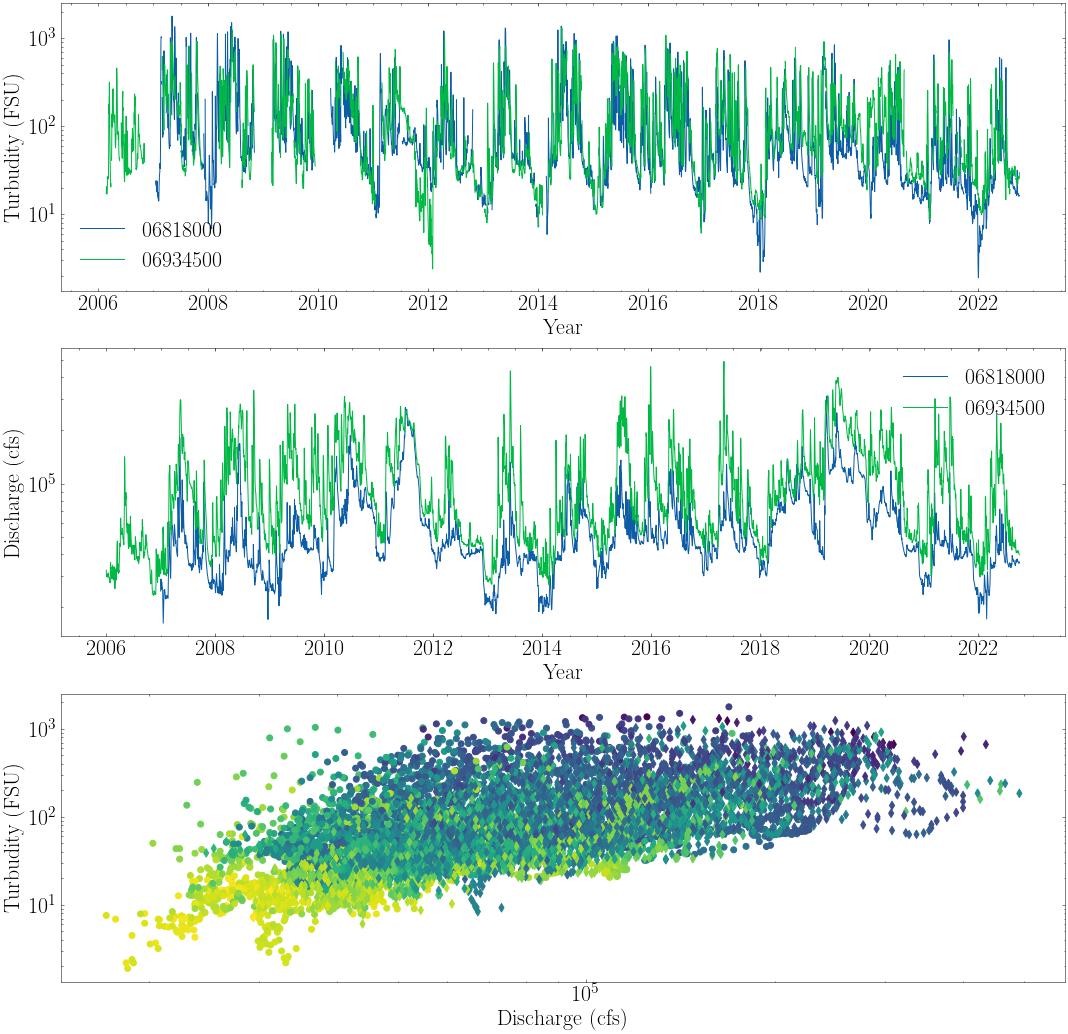

In [299]:
sitename = '06818000'
start_date = '2007-01-01'
# start_date = '2019-01-01'
drain_area = 426500 # square miles
df06818000 = read_site(sitename, start_date, drain_area)

sitename = '06934500'
drain_area = 522500 # square miles
start_date = '2006-01-01'
# start_date = '2019-01-01'
df06934500 = read_site(sitename, start_date, drain_area)



#fig, (ax2, ax3) = plt.subplots(1,2, figsize=(14, 6))
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(18, 18))
ax1.plot(df06818000['datetime'],df06818000['turbidity'], label=df06818000['site'][0])
ax2.plot(df06818000['datetime'],df06818000['discharge'], label=df06818000['site'][0])
ax3.scatter(df06818000['discharge'], df06818000['turbidity'], marker ='o', c = df06818000['DO'])
ax1.plot(df06934500['datetime'],df06934500['turbidity'], label=df06934500['site'][0])
ax2.plot(df06934500['datetime'],df06934500['discharge'], label=df06934500['site'][0])
ax3.scatter(df06934500['discharge'], df06934500['turbidity'],marker = 'd', c = df06934500['DO'])

ax1.set_yscale('log')
ax2.set_yscale('log')
ax3.set_yscale('log')
ax3.set_xscale('log')
ax1.set_xlabel('Year')
ax1.set_ylabel('Turbudity (FSU)')
ax2.set_xlabel('Year')
ax2.set_ylabel('Discharge (cfs)')
ax3.set_xlabel('Discharge (cfs)')
ax3.set_ylabel('Turbudity (FSU)')
ax1.legend()
ax2.legend()

# Exame individual year

The relation between discharge and sediment load changes over years. Here, we plot the data for each individual year using differnet colors. 

Text(0.5, 0.98, 'Site \\# = 06934500')

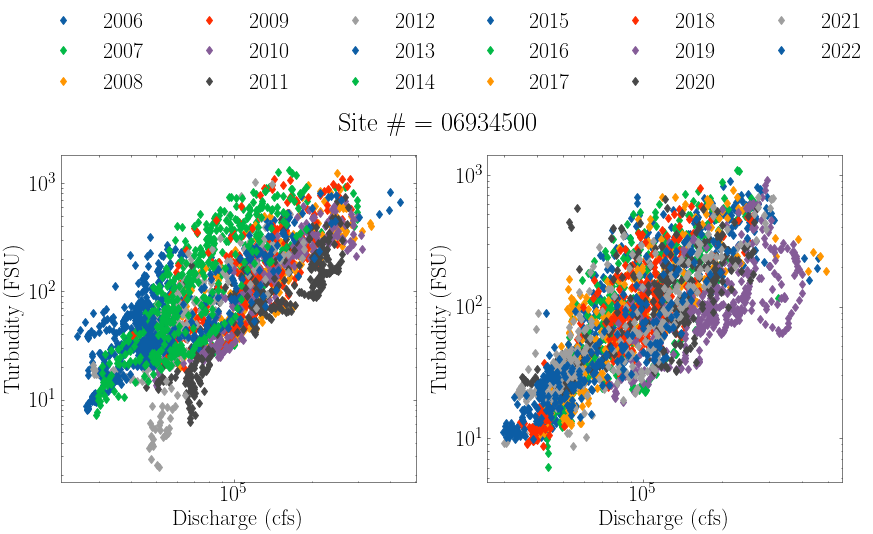

In [294]:
# examine each year - stationary effect 
import datetime as dt

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(14,6))
for year in range(2006,2023):
    year_mask = df06934500['datetime'].dt.year == year
    if year < 2015:
        ax1.plot(df06934500['discharge'][year_mask], df06934500['turbidity'][year_mask], 'd', label = year)
    else:
        ax2.plot(df06934500['discharge'][year_mask], df06934500['turbidity'][year_mask], 'd', label = year)   
ax1.set_xscale('log') 
ax1.set_yscale('log')
ax1.set_xlabel('Discharge (cfs)')
ax1.set_ylabel('Turbudity (FSU)')
ax1.legend(loc='upper center', bbox_to_anchor=(0.5, 1.5), ncol = 3)

ax2.set_xscale('log') 
ax2.set_yscale('log')
ax2.set_xlabel('Discharge (cfs)')
ax2.set_ylabel('Turbudity (FSU)')
ax2.legend(loc='upper center', bbox_to_anchor=(0.5, 1.5), ncol = 3)
title_text = 'Site \# ' + str(df06934500['site'][0])
fig.suptitle(title_text)

Text(0.5, 0.98, 'Site \\# = 06818000')

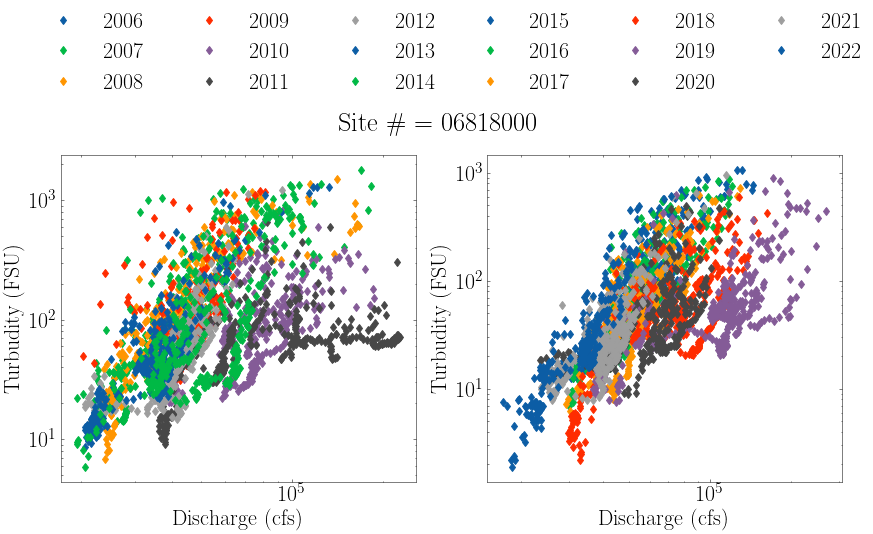

In [295]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(14,6))
for year in range(2006,2023):
    year_mask = df06818000['datetime'].dt.year == year
    if year < 2015:
        ax1.plot(df06818000['discharge'][year_mask], df06818000['turbidity'][year_mask], 'd', label = year)
    else:
        ax2.plot(df06818000['discharge'][year_mask], df06818000['turbidity'][year_mask], 'd', label = year)   
ax1.set_xscale('log') 
ax1.set_yscale('log')
ax1.set_xlabel('Discharge (cfs)')
ax1.set_ylabel('Turbudity (FSU)')
ax1.legend(loc='upper center', bbox_to_anchor=(0.5, 1.5), ncol = 3)

ax2.set_xscale('log') 
ax2.set_yscale('log')
ax2.set_xlabel('Discharge (cfs)')
ax2.set_ylabel('Turbudity (FSU)')
ax2.legend(loc='upper center', bbox_to_anchor=(0.5, 1.5), ncol = 3)
title_text = 'Site \# ' + str(df06818000['site'][0])
fig.suptitle(title_text)